# Project 1: Descent (Part 2)

Digging at the lowest point of Olduvai Gorge, you discover a hatch:

![Hatch](./img/hatch.jpg)

You descend a ladder into the hatch until you reach a sloped surface. Armed only with a GPS and torch (both the light source and the Python matrix manipulation package), you can't really see much beyond your own two feet. Luckily, you've studied gradient descent algorithms, so you know what to do.

You begin by establishing an interface for the unlit environment you find yourself in, noting that you can do the following:

- determine your current (x,y) position
- determine the gradient at a particular (x,y) position
- step to a new (x,y) position
- determine whether you can see the exit (the lowest point)
- determine your current status (actively searching, found the exit)

Here is the interface:

```
class Environment:      
    def current_position(self):
        """
        Returns your current (x,y) position.
        
        The return value is a 2-dimensional torch.tensor, e.g.
        torch.tensor([x,y]).        
        """
        
    def gradient(self, position):
        """
        Returns the gradient at a particular position.
        
        position is a 2-dimensional torch.tensor, e.g. torch.tensor([x,y])
          where (x,y) is the current position
          
        The return value is also a 2-dimensional torch.tensor.        
        """
        
    def step_to(self, position):
        """
        Changes your current (x,y) position to the new position.
        
        position is a 2-dimensional torch.tensor, e.g. torch.tensor([x,y]).        
        """

    def can_see_exit(self, position):
        """
        Returns True if you can see the exit from the specified position.        
        """
        
    def status(self):
        """
        Returns the current status of your search.
        
        - Environment.ACTIVELY_SEARCHING means that the search is still active.
        - Environment.EXCEEDED_STEP_LIMIT means that you have exceeded the
          maximum number of steps that you are willing to take
        - Environment.FOUND_EXIT means that you have found the lowest point
          of the environment.
        """
```    


Note that you're a little frightened of the dark, so you decide that you won't take more than 100 steps before retreating back to the entry hatch and trying a new strategy. This is tracked by the environment, which returns the status EXCEEDED_STEP_LIMIT if you've taken too many steps.


In [1]:
import torch
import levels
from levels import Environment

You also would like a way to visualize your steps, so you make the following plotting functions using matplotlib.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

def visualize_journey(positions, found_destination):
    """
    Plots a series of (x,y) positions. The first point is orange, the intermediate points are gray, and the
    final point is green or red, depending (respectively) on whether the destination has or has not been found.
    
    positions is a list of 2-dimensional torch.tensors
    found_destination is a boolean indicating whether the destination was found
    
    """
    xs = []
    ys = []
    for pt in positions:
        xs.append(pt[0].item())
        ys.append(pt[1].item())
    plt.scatter(xs, ys, color='gray')
    plt.plot(xs, ys, color='gray')
    plt.scatter([0], [0], color='orange')
    if found_destination:
        final_color = 'lime'
    else:
        final_color = 'red'
    plt.scatter([positions[-1][0].item()], [positions[-1][1].item()], color=final_color)
    plt.show()

As an example, here is the visualization of a journey that begins at point (0,0), then proceeds to points (3,1), (6,-1), and (5,-2), without finding the exit.

In [ ]:
from torch import tensor
positions = [tensor([0.0, 0.0]), tensor([3.0, 1.0]), tensor([6.0, -1.0]), tensor([5.0, -2.0])]
visualize_journey(positions, False)

### Question 1

Implement a general-purpose gradient descent algorithm, so that you can start exploring the environment. Specifically, complete the function ```grad_descent``` in ```algorithms.py```, according to the specifications in its comments.

There's a unit test in test.py, so that you can check your algorithm is working properly. Run it from the command line as follows:

    python -m unittest test.GradientDescentTests.test_vanilla
    
Once it's working, you should be ready to find the lowest point in the environment.

In [ ]:
from algorithms import vanilla_grad_descent
env = levels.Level1()
points = vanilla_grad_descent(0.95, env)
if len(points[1:]) == 51:
    visualize_journey(points, env.can_see_exit(points[-1]))
else:
    print("Looks like there's still a bug in your grad_descent code.")

After a mere 51 steps, you catch sight of yet another hatch:

![Hatch](./img/hatch2.jpg)

You take another ladder down into yet another dark environment. Well, it worked last time, so let's try vanilla gradient descent once again.

In [ ]:
env = levels.Level2()
points = vanilla_grad_descent(0.95, env)
visualize_journey(points, env.can_see_exit(points[-1]))

After 100 steps, you still haven't found the exit, so you retrace your steps back to the entrance. Visualizing your previous journey, it seems like you're in a narrow ravine with steeply sloping sides, which is causing you to go back and forth sharply across the width of the ravine, but not make much forward progress along its length. You've read about this phenomenon in class, and remember that one way to deal with it is to use gradient descent with *momentum*. 

### Question 2

Complete the implementation of gradient descent with momentum (```momentum_grad_descent```) in ```algorithms.py```, according to the specifications in its comments.

Again we've provided a unit test in test.py, so that you can check your algorithm is working properly. Run it from the command line as follows:

    python -m unittest test.GradientDescentTests.test_momentum
    
Confident in your test-passing implementation, you steel yourself and head into the darkness.

In [ ]:
from algorithms import momentum_grad_descent
env = levels.Level2()
points = momentum_grad_descent(0.95, env)
if len(points[1:]) == 93:
    visualize_journey(points, env.can_see_exit(points[-1]))
else:
    print("Looks like there's still a bug in your grad_descent code.")

After 93 steps, you find a third hatch:

![Hatch](./img/hatch3.jpg)

Again, you go down. You try a few steps of gradient descent with momentum...

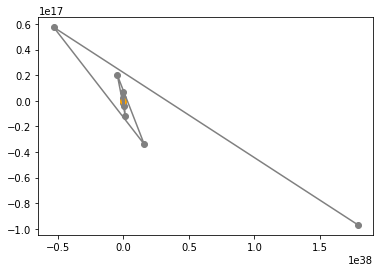

In [7]:
env = levels.Level3()
points = momentum_grad_descent(0.95, env)
visualize_journey(points, env.can_see_exit(points[-1]))


...but quickly realize you're spinning out of control (notice the scale of the axes). It seems that your step size is too large. You go back to vanilla gradient descent with a smaller step size.

In [ ]:
env = levels.Level3()
points = vanilla_grad_descent(0.05, env)
visualize_journey(points, env.can_see_exit(points[-1]))


Unfortunately, you find another hatch. Hopefully this the last one.

![Hatch](./img/hatch4.jpg)

You try out vanilla gradient descent with the same conservative step size.


In [ ]:
env = levels.Level4()
points = vanilla_grad_descent(0.05, env)
visualize_journey(points, env.can_see_exit(points[-1]))


After 100 steps, you declare defeat and go back to the entrance. You're a bit tired of guessing the correct step size, so you'd like to try a gradient descent method with an adaptive step size (i.e. one where the step size is a function of time). You can't help but notice that the slopes of this level aren't particularly smooth. You proceeded directly east for a long time before the gradient started leading you south. Therefore you don't want to use an adaptive method where the step size decreases in all dimensions at the same rate, because by the time you reach the south-leading slope, your step size would likely be too tiny to make any good progress.

Luckily, you remember AdaGrad is a gradient descent method where the rate changes independently in each dimension.

### Question 3

Complete the implementation of AdaGrad (```adagrad```) in ```algorithms.py```, according to the specifications in its comments.

We've provided a unit test in test.py, so that you can check your algorithm is working properly. Run it from the command line as follows:

    python -m unittest test.GradientDescentTests.test_adagrad
    
Confident in your implementation, you try navigating the fourth level again.

In [ ]:
from algorithms import adagrad
env = levels.Level4()
points = adagrad(0.95, env)
if len(points[1:]) == 101:
    visualize_journey(points, env.can_see_exit(points[-1]))
else:
    print("Looks like there's still a bug in your adagrad code.")

Seems like you're close, but no cigar. You seem to remember learning that AdaGrad can sometimes converge too quickly, and that RmsProp might be a better choice for some topologies. Looks like it's back to implementation!

### Question 4

Complete the implementation of RmsProp (```rmsprop```) in ```algorithms.py```, according to the specifications in its comments.

We've provided a unit test in test.py, so that you can check your algorithm is working properly. Run it from the command line as follows:

    python -m unittest test.GradientDescentTests.test_rmsprop
    
Third time's the charm! You head out again, into the darkness.

In [ ]:
from algorithms import rmsprop
env = levels.Level4()
points = rmsprop(0.4, 0.95, env)
if len(points[1:]) == 35:
    visualize_journey(points, env.can_see_exit(points[-1]))
else:
    print("Looks like there's still a bug in your rmsprop code.")

This time, there's no hatch, just a weird chest.

![Chest](./img/chest.jpg)

You open it. There inside is the magnificent Chekhov's Sun. But what are you planning to do with the world's largest yellow diamond? After correctly implementing four different gradient descent algorithms, the answer should be easy.

In [ ]:
def answer():
    points = vanilla_grad_descent(0.95, levels.LevelX())
    points2 = momentum_grad_descent(0.95, levels.LevelX())
    points3 = adagrad(0.95, levels.LevelX())
    points4 = rmsprop(0.4, 0.95, levels.LevelX())
    ALPHABET = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    letter1 = ALPHABET[int(points[3][0].item()) - 11]
    letter2 = ALPHABET[int(points2[3][0].item()) - 8]
    letter3 = ALPHABET[int(points3[3][0].item()) + 16]
    letter4 = ALPHABET[int(points4[3][0].item())]
    letter5 = ALPHABET[int(points2[5][0].item()) - 20]
    letter6 = ALPHABET[int(points4[5][0].item()) + 7]
    word = '{}{}{}{}{}{}'.format(letter1, letter2, letter3, letter4, letter5, letter6)
    return word

def submit(response):
    import rpyc
    c = rpyc.connect("localhost", 18861)
    return c.root.submit_response('q2', response)

print('You submit the password {} to the server.'.format(answer()))
submit(answer())